In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!ls

drive  sample_data


In [4]:
%cd drive/MyDrive

/content/drive/MyDrive


In [5]:
import pandas as pd
data1 = pd.read_csv('20221029-053129_annot_df_sorted_subclassed_slide_no_2.csv')
data2 = pd.read_csv('20221030-011825_annot_df_sorted_subclassed_MLFs_32_slide_no_2.csv')
data = pd.concat([data1, data2])

In [6]:
data.sample(n=50)

,Unnamed: 0,key,uid,ctr,coord,lbl,guid,subcl
122,80,84,84,"[6294, 32815]",[[ 6269 32790]\r\n [ 6319 32840]],1,eb9c5e35-4678-43f4-9ac5-9e6a98c692d7,42
48,127,136,136,"[38546, 38734]",[[38521 38709]\r\n [38571 38759]],2,d16521c6-5d6b-44de-860d-88dcf643fab7,7
263,87,91,91,"[43141, 32525]",[[43116 32500]\r\n [43166 32550]],1,40d38f3e-7e9b-4479-ad24-43b531750ed8,9
233,144,156,156,"[35338, 45875]",[[35313 45850]\r\n [35363 45900]],1,e42bbe4c-5d1d-44b0-83c7-454a03ff30b6,9
226,126,134,134,"[22826, 39227]",[[22801 39202]\r\n [22851 39252]],1,c8c272d3-8d93-46ad-8902-376a8bfc16aa,9
83,182,1390,1390,"[14168, 33048]",[[14143 33023]\r\n [14193 33073]],1,78b554d8-9df1-4ec5-aa64-5a5ab4e022c2,9
194,7,8,8,"[14561, 9753]",[[14536 9728]\r\n [14586 9778]],1,93897268-c222-4f52-9897-14f9f2708da7,9
147,48,50,50,"[24168, 23413]",[[24143 23388]\r\n [24193 23438]],1,8173d017-9298-4b59-9643-41dda77eb357,42
56,205,1413,1413,"[6671, 38714]",[[ 6646 38689]\r\n [ 6696 38739]],1,24a42676-16e7-440f-836c-cf974f8bcd86,42
158,70,73,73,"[6640, 32184]",[[ 6615 32159]\r\n [ 6665 32209]],1,aa000733-60e5-4c9d-ba60-049431209cf3,42


In [7]:
%cd MITOS_WSI_CMC/

/content/drive/MyDrive/MITOS_WSI_CMC


In [8]:
%cd databases

/content/drive/MyDrive/MITOS_WSI_CMC/databases


In [9]:
data.head()
data['subcl'] = data['subcl'].replace(42,9)
data_filtered = data[data['subcl'] != 9]
data = data_filtered.copy()

In [10]:
data = data[data['subcl'] != 0]

In [11]:
len(data)

90

In [12]:
subclass_annotations = data.drop(['ctr', 'coord', 'guid'], axis = 1)
subclass_annotations.head()
len(subclass_annotations)

90

In [15]:

!ls

0.png	32.png	55.png	78.png
10.png	33.png	56.png	79.png
11.png	34.png	57.png	7.png
12.png	35.png	58.png	80.png
13.png	36.png	59.png	81.png
14.png	37.png	5.png	82.png
15.png	38.png	60.png	83.png
16.png	39.png	61.png	84.png
17.png	3.png	62.png	85.png
18.png	40.png	63.png	86.png
19.png	41.png	64.png	87.png
1.png	42.png	65.png	88.png
20.png	43.png	66.png	89.png
21.png	44.png	67.png	8.png
22.png	45.png	68.png	9.png
23.png	46.png	69.png	databaseStatistics.ipynb
24.png	47.png	6.png	Data_CMC-f
25.png	48.png	70.png	MITOS_WSI_CMC_COADEL_TR.sqlite
26.png	49.png	71.png	MITOS_WSI_CMC_CODAEL_TR_ROI.sqlite
27.png	4.png	72.png	MITOS_WSI_CMC_MEL.sqlite
28.png	50.png	73.png	MITOS_WSI_CMC_ODAEL_TR.sqlite
29.png	51.png	74.png	subclass_patches
2.png	52.png	75.png	TUPAC_alternativeLabels_augmented_training.sqlite
30.png	53.png	76.png	TUPAC.sqlite
31.png	54.png	77.png	TUPAC_stitched.sqlite


In [13]:
%cd MITOS_WSI_CMC

[Errno 2] No such file or directory: 'MITOS_WSI_CMC'
/content/drive/MyDrive/MITOS_WSI_CMC/databases


In [20]:
!pwd

/content/drive/MyDrive/MITOS_WSI_CMC


In [23]:
%cd ..

/content/drive/MyDrive/MITOS_WSI_CMC


/content/drive/MyDrive/MITOS_WSI_CMC


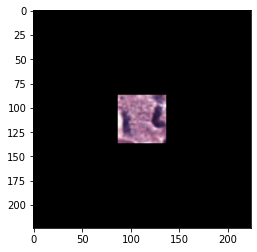

0     4
1     7
2     7
3     4
4     7
     ..
29    8
30    8
31    8
32    8
33    8
Name: subcl, Length: 90, dtype: int64


In [93]:
from numpy.core.multiarray import packbits
#Load FSL CSV
#Load images
!pwd
import os
from os import listdir
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

labels = subclass_annotations['subcl']
imagelist = []

# get the path/directory
folder_dir = "databases"
i = 0
while (i<90):
 
    # check if the image ends with png
    #if (images.endswith(".png")):
     #   print(images)
        temp = mpimg.imread('/content/drive/MyDrive/MITOS_WSI_CMC/databases/' + str(i) + str('.png'))
        plt.imshow(temp)
        temp = cv2.copyMakeBorder(temp, 87, 87, 87, 87, cv2.BORDER_CONSTANT)
        plt.imshow(temp)
        imagelist.append(temp)
        i = i + 1
#train_images, test_images = train_images / 255.0, test_images / 255.0

plt.imshow(imagelist[55])
plt.show()
print(labels)

In [95]:
import numpy as np

labels.sample(n=50)
data.sample(n=50)

,Unnamed: 0,key,uid,ctr,coord,lbl,guid,subcl
19,194,1402,1402,"[23555, 35432]",[[23530 35407]\r\n [23580 35457]],1,95b38345-fb7e-45e2-9070-e0951115aa38,8
9,183,1391,1391,"[28267, 32810]",[[28242 32785]\r\n [28292 32835]],1,56ef32ec-efe9-4180-a73a-ce121240eb51,8
23,201,1409,1409,"[10807, 37109]",[[10782 37084]\r\n [10832 37134]],2,e0a9f236-f277-4011-9b3b-f8972cd66503,7
41,138,149,149,"[40985, 40030]",[[40960 40005]\r\n [41010 40055]],2,924ee197-3f86-461e-bd5f-4f97fb311ec5,7
3,188,1396,1396,"[14790, 34067]",[[14765 34042]\r\n [14815 34092]],2,47118562-d433-49d2-9c72-b0c1fa5242ea,4
24,72,75,75,"[7381, 31587]",[[ 7356 31562]\r\n [ 7406 31612]],2,8245fdbf-a30d-4e8f-adcb-fcce63750220,7
29,121,127,127,"[8524, 37594]",[[ 8499 37569]\r\n [ 8549 37619]],1,8f8a590d-7692-489d-856e-710342a7a159,8
26,66,69,69,"[17102, 30944]",[[17077 30919]\r\n [17127 30969]],2,33f9b8a3-a61d-44cd-9cac-b8c555de1c12,7
6,180,1388,1388,"[7874, 32202]",[[ 7849 32177]\r\n [ 7899 32227]],1,e7002dc1-c468-424f-a5c0-f14907519e1c,8
20,195,1403,1403,"[10939, 35357]",[[10914 35332]\r\n [10964 35382]],1,35c9e138-54bf-480b-ab46-c7ca0a5148e0,8


In [96]:
from sklearn.model_selection import train_test_split
X = imagelist.copy()
labels = tf.one_hot(labels, 9)
X = np.asarray(X)
y = np.asarray(labels)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [99]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

res_model = tf.keras.applications.resnet50.ResNet50(include_top=True,weights='imagenet',input_tensor=None,input_shape=None,pooling=None, classes=1000)

res_model.summary()
X_train.shape

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

(63, 224, 224, 3)

In [100]:
for layer in res_model.layers[:143]:
  layer.trainable=False

In [101]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense
model = keras.models.Sequential()
model.add(res_model)
model.add(keras.layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(keras.layers.Dense(9, activation='softmax'))


In [91]:
X_train.shape

(63, 224, 224, 3)

In [88]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten_6 (Flatten)         (None, 1000)              0         
                                                                 
 dense_14 (Dense)            (None, 512)               512512    
                                                                 
 dense_15 (Dense)            (None, 9)                 4617      
                                                                 
Total params: 26,153,841
Trainable params: 17,542,129
Non-trainable params: 8,611,712
_________________________________________________________________


In [102]:
model.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test , y_test))


Epoch 1/10
2/2 [==============================] - 27s 13s/step - loss: 2.1765 - accuracy: 0.2698 - val_loss: 2.1173 - val_accuracy: 0.4444
Epoch 2/10
2/2 [==============================] - 22s 14s/step - loss: 2.0855 - accuracy: 0.4444 - val_loss: 2.0143 - val_accuracy: 0.4444
Epoch 3/10
2/2 [==============================] - 26s 15s/step - loss: 1.9832 - accuracy: 0.4444 - val_loss: 1.9357 - val_accuracy: 0.4444
Epoch 4/10
2/2 [==============================] - 22s 13s/step - loss: 1.9038 - accuracy: 0.4444 - val_loss: 1.8707 - val_accuracy: 0.4444
Epoch 5/10
2/2 [==============================] - 20s 12s/step - loss: 1.8367 - accuracy: 0.4444 - val_loss: 1.8128 - val_accuracy: 0.4444
Epoch 6/10
2/2 [==============================] - 22s 14s/step - loss: 1.7772 - accuracy: 0.4444 - val_loss: 1.7608 - val_accuracy: 0.4444
Epoch 7/10
2/2 [==============================] - 20s 12s/step - loss: 1.7242 - accuracy: 0.4444 - val_loss: 1.7123 - val_accuracy: 0.4444
Epoch 8/10
2/2 [===========

In [92]:
print(model.predict(X_train))

2/2 [==============================] - 11s 5s/step
[[0.05032987 0.05780765 0.05687233 0.06492803 0.08032712 0.06204227
  0.07016003 0.3185308  0.23900193]
 [0.05032987 0.05780765 0.05687233 0.06492803 0.08032712 0.06204227
  0.07016003 0.3185308  0.23900193]
 [0.05032987 0.05780765 0.05687233 0.06492803 0.08032712 0.06204227
  0.07016003 0.3185308  0.23900193]
 [0.05032987 0.05780765 0.05687233 0.06492803 0.08032712 0.06204227
  0.07016003 0.3185308  0.23900193]
 [0.05032987 0.05780765 0.05687233 0.06492803 0.08032712 0.06204227
  0.07016003 0.3185308  0.23900193]
 [0.05032987 0.05780765 0.05687233 0.06492803 0.08032712 0.06204227
  0.07016003 0.3185308  0.23900193]
 [0.05032987 0.05780765 0.05687233 0.06492803 0.08032712 0.06204227
  0.07016003 0.3185308  0.23900193]
 [0.05032987 0.05780765 0.05687233 0.06492803 0.08032712 0.06204227
  0.07016003 0.3185308  0.23900193]
 [0.05032987 0.05780765 0.05687233 0.06492803 0.08032712 0.06204227
  0.07016003 0.3185308  0.23900193]
 [0.05032987 

1/1 - 4s - loss: 1.5969 - accuracy: 0.4444 - 4s/epoch - 4s/step
0.4444444477558136


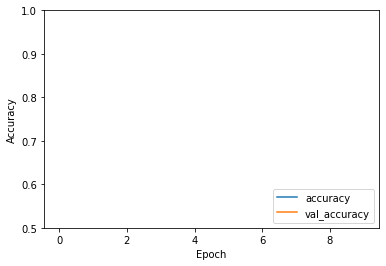

In [103]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)


In [105]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)


1/1 [==============================] - 5s 5s/step


In [107]:
print(y_pred)

[[0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909724
  0.07425232 0.2853219  0.24083808]
 [0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909724
  0.07425232 0.2853219  0.24083808]
 [0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909724
  0.07425232 0.2853219  0.24083808]
 [0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909724
  0.07425232 0.2853219  0.24083808]
 [0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909724
  0.07425232 0.2853219  0.24083808]
 [0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909724
  0.07425232 0.2853219  0.24083808]
 [0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909724
  0.07425232 0.2853219  0.24083808]
 [0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909724
  0.07425232 0.2853219  0.24083808]
 [0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909724
  0.07425232 0.2853219  0.24083808]
 [0.05792671 0.05764895 0.06686323 0.06300951 0.09504197 0.05909

In [108]:
print(y_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [42]:
labels.head()

0    4
1    7
2    7
3    4
4    7
Name: subcl, dtype: int64

In [48]:
print(y_pred)

[[0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092394
  0.03556804 0.4443672  0.3476739 ]
 [0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092394
  0.03556804 0.4443672  0.3476739 ]
 [0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092394
  0.03556804 0.4443672  0.3476739 ]
 [0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092394
  0.03556804 0.4443672  0.3476739 ]
 [0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092394
  0.03556804 0.4443672  0.3476739 ]
 [0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092394
  0.03556804 0.4443672  0.3476739 ]
 [0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092394
  0.03556804 0.4443672  0.3476739 ]
 [0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092394
  0.03556804 0.4443672  0.3476739 ]
 [0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092394
  0.03556804 0.4443672  0.3476739 ]
 [0.01584424 0.01539911 0.01804738 0.02671335 0.06546292 0.03092